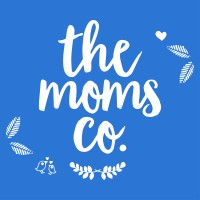

## Scraping data from an e-commerce website.

The Moms Co is an e-commerce website that sells cosmetics as well as daily need products for pregnant women and newborn babies.

We are here to analyze data that can be scraped from the website and gain insights that can be used to make informed decisions.







## Objective:
1. Scrap data from the official website.
2. Then create a dataframe with all the necessay features
3. Inspect the data for any error
4. Save the data in the form of CSV
5. Export data to tableau and build a dashboard that can be used to visualise.

In [1]:
#lets try to scrap the data

In [2]:
#lets install library's
!pip install requests
!pip install bs4
!pip install html5lib
!pip install selenium
!pip install webdriver_manager

In [3]:
#lets import all the required library
import matplotlib.pyplot as plt
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service as ChromeService 
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
#Download the page in the form of HTML
url = "https://themomsco.com/buy/all-products" 
 
driver = webdriver.Chrome(service=ChromeService( 
	ChromeDriverManager().install())) 
 
driver.get(url) 
 
print(driver.page_source)

<html translate="no" dir="ltr" lang="en-in"><head><meta charset="utf-8"><meta name="theme-color" content="#3D76C9"><meta name="viewport" content="width=device-width, maximum-scale=1, minimum-scale=1, initial-scale=1, user-scalable=no, shrink-to-fit=no"><meta http-equiv="ScreenOrientation" content="autoRotate:disabled"><meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate"><meta http-equiv="Pragma" content="no-cache"><meta http-equiv="Expires" content="0"><link id="favicon" rel="icon" href="https://files.myglamm.com/site-images/original/favicon_2.png"><meta property="og:title" content="The Moms Co Natural Mother and Baby Care Products"><meta property="og:description" content="Explore the mom and baby care products for skin, body and hair with The Moms Co. All our products are Australia certified, natural and safe for both newborn babies and pregnant moms."><meta property="og:type" content="website"><meta property="og:site_name" content="themomsco"><meta property=

In [3]:
#Use BeautifulSoup to extract desired information from the web page 
soup = BeautifulSoup(driver.page_source,"html.parser")
print(soup)

<html dir="ltr" lang="en-in" translate="no"><head><meta charset="utf-8"/><meta content="#3D76C9" name="theme-color"/><meta content="width=device-width, maximum-scale=1, minimum-scale=1, initial-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><meta content="autoRotate:disabled" http-equiv="ScreenOrientation"/><meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/><meta content="no-cache" http-equiv="Pragma"/><meta content="0" http-equiv="Expires"/><link href="https://files.myglamm.com/site-images/original/favicon_2.png" id="favicon" rel="icon"/><meta content="The Moms Co Natural Mother and Baby Care Products" property="og:title"/><meta content="Explore the mom and baby care products for skin, body and hair with The Moms Co. All our products are Australia certified, natural and safe for both newborn babies and pregnant moms." property="og:description"/><meta content="website" property="og:type"/><meta content="themomsco" property="og:site_name"/><me

In [4]:
#Lets create the lsit of all the product available at the website
product_name = soup.find_all("p",class_="line-clamp-2 font-bold text-xl h-15 mb-1")
product_name_list=[]
for x in product_name:
    product_name_list.append(x.string)
    
product_name_list

['Natural Baby Soap',
 'Natural Daily Sunscreen',
 'Natural Daily Face Toner (200 ml)',
 'Natural Vita Rich Under Eye Cream (15gm) - Face Care',
 'Natural Age Control Night Cream (50gm) - Face Care',
 'Natural Body Wash (200ml)',
 'Natural Brightening Vitamin C Face Cream (50 Gm)',
 'Natural Green Tea Face Toner (100 ml)',
 'Natural Age Control Day Cream (50GM)',
 'Natural Baby Sunscreen with SPF 50+ (100ml) - Baby Care',
 'C-T-M Daily Skincare Essentials Box',
 'Natural Age Control Moisturizing Bundle',
 'Natural Age Control Night Repair Bundle',
 'Natural Age Control Day and Night Care Combo',
 'Natural Baby Soap (Pack of 2)',
 'Natural Mosquito Repellent (100 ML)',
 'Natural Diaper Rash Cream (25gm) - Baby Care',
 'Natural Vita Rich Face Serum (30ML)',
 'Natural Green Tea Night Gel (50gm)',
 'Natural Green Tea Face Cream (50gm)',
 'Soft Baby Skin Bundle',
 'Natural Bath Essentials for Baby',
 'Natural Tear-Free Cleaning Bundle for Baby',
 'Baby Bath Bestseller combo',
 'Natural 99% 

In [5]:
#Fetch the selling price and the original price of each product
product_price =soup.find_all("div",class_="flex items-center font-bold text-2xl")
product_selling_price_list = []

for x in range(0,len(product_price)):
    product_selling_price_list.append(int(str(product_price[x]).split("<span>")[1].split("</span>")[0][1:].replace(",","")))
    
product_selling_price_list

[113,
 287,
 255,
 284,
 519,
 226,
 375,
 147,
 454,
 308,
 582,
 647,
 697,
 973,
 181,
 226,
 129,
 699,
 387,
 375,
 511,
 659,
 511,
 417,
 671,
 454,
 445,
 552,
 255,
 269,
 350,
 586,
 766,
 147,
 255,
 255,
 454,
 194,
 293,
 255,
 454,
 255,
 699,
 524,
 215,
 255,
 265,
 429,
 454,
 295,
 162,
 293,
 320,
 226,
 187,
 599,
 267,
 129,
 419,
 1279,
 500,
 693,
 1148,
 1035,
 1049,
 998,
 998,
 998,
 998,
 548,
 642,
 249,
 162,
 358,
 162,
 475,
 849,
 335,
 341,
 162,
 255,
 556,
 547,
 226,
 387,
 1092,
 162,
 449,
 641,
 549,
 579,
 226,
 592,
 569,
 194,
 1398,
 302,
 382,
 226,
 194,
 387,
 587,
 147,
 515,
 493,
 1679,
 655,
 308,
 792,
 404,
 704,
 1386,
 909,
 909,
 1014,
 1184,
 763,
 389,
 1226,
 762,
 162,
 355,
 1437,
 510,
 672,
 524,
 492,
 534,
 215,
 725,
 357,
 524,
 761,
 772,
 364,
 176,
 873,
 384,
 998,
 998,
 1097,
 1097,
 998,
 1092,
 337,
 462,
 510,
 213,
 226,
 194,
 291,
 284,
 723,
 147,
 398,
 320,
 924,
 569,
 318,
 279]

In [6]:
product_original_price_list = []

for x in range(0,len(product_price)):
    try:
        product_original_price_list.append(int(str(product_price[x]).split('<del class="opacity-40 ml-1.5">')[1].split('</del>')[0][1:].replace(",","")))
    except:
        product_original_price_list.append(product_selling_price_list[x])
    
product_original_price_list

[150,
 442,
 393,
 474,
 798,
 348,
 577,
 226,
 699,
 474,
 969,
 1294,
 1393,
 1497,
 279,
 348,
 199,
 699,
 595,
 577,
 786,
 1179,
 786,
 642,
 895,
 699,
 741,
 849,
 393,
 448,
 499,
 1172,
 1276,
 226,
 393,
 393,
 699,
 299,
 450,
 393,
 699,
 393,
 1398,
 699,
 393,
 393,
 492,
 429,
 699,
 393,
 249,
 450,
 492,
 348,
 249,
 599,
 297,
 199,
 599,
 1279,
 500,
 693,
 1148,
 1035,
 1049,
 998,
 998,
 998,
 998,
 548,
 642,
 249,
 249,
 597,
 249,
 475,
 849,
 447,
 525,
 249,
 393,
 556,
 547,
 348,
 595,
 1092,
 249,
 599,
 916,
 1052,
 579,
 348,
 592,
 948,
 298,
 1398,
 378,
 478,
 348,
 298,
 595,
 1173,
 226,
 858,
 822,
 2399,
 1091,
 474,
 1320,
 786,
 1173,
 1980,
 1299,
 1299,
 1689,
 1692,
 1272,
 599,
 2043,
 1172,
 249,
 546,
 2395,
 1020,
 1344,
 1047,
 984,
 822,
 429,
 1449,
 549,
 1047,
 1521,
 1287,
 486,
 270,
 1746,
 591,
 998,
 998,
 1097,
 1097,
 998,
 1092,
 674,
 923,
 1020,
 425,
 348,
 298,
 447,
 334,
 723,
 226,
 497,
 492,
 1421,
 948,
 398,
 429]

In [7]:
len(product_original_price_list),len(product_selling_price_list),len(product_name_list)

(160, 160, 160)

In [8]:
#now lets create a data frame from the available information
dataframe_dict = {"Product_Name":product_name_list,
                 "Selling_Price":product_selling_price_list,
                 "Original_Price":product_original_price_list}

import pandas as pd

df = pd.DataFrame(dataframe_dict)
df.head()

,Product_Name,Selling_Price,Original_Price
0,Natural Baby Soap,113,150
1,Natural Daily Sunscreen,287,442
2,Natural Daily Face Toner (200 ml),255,393
3,Natural Vita Rich Under Eye Cream (15gm) - Fac...,284,474
4,Natural Age Control Night Cream (50gm) - Face ...,519,798


In [9]:
#lets add some more information to the our dataframe
df["Discount"] = round((df["Original_Price"] - df["Selling_Price"])/df["Original_Price"],2)

In [10]:
df.head()

,Product_Name,Selling_Price,Original_Price,Discount
0,Natural Baby Soap,113,150,0.25
1,Natural Daily Sunscreen,287,442,0.35
2,Natural Daily Face Toner (200 ml),255,393,0.35
3,Natural Vita Rich Under Eye Cream (15gm) - Fac...,284,474,0.40
4,Natural Age Control Night Cream (50gm) - Face ...,519,798,0.35


In [14]:
#now we also need link to these pages
link_to_page = soup.find_all("a",class_="p-5 border border-gray-300 mb-2")
link_list = []
for link in link_to_page:
    link_list.append("https://themomsco.com"+link.get("href"))
    
link_list

['https://themomsco.com/product/natural-baby-soap-75g.html',
 'https://themomsco.com/product/natural-daily-sunscreen.html',
 'https://themomsco.com/product/natural-vitamin-c-daily-face-toner-200-ml.html',
 'https://themomsco.com/product/natural-vita-rich-under-eye-cream-15g.html',
 'https://themomsco.com/product/natural-age-control-night-cream-50gm.html',
 'https://themomsco.com/product/natural-body-wash-200ml.html',
 'https://themomsco.com/product/natural-skin-brightening-vitamin-c-face-cream-50.html',
 'https://themomsco.com/product/natural-green-tea-face-toner-100ml.html',
 'https://themomsco.com/product/natural-age-control-day-cream-50-gm.html',
 'https://themomsco.com/product/natural-sunscreen.html',
 'https://themomsco.com/product/daily-skincare-essential-kit.html',
 'https://themomsco.com/product/natural-age-control-moisturizing-bundle.html',
 'https://themomsco.com/product/natural-age-control-night-repair-bundle.html',
 'https://themomsco.com/product/natural-age-control-day-and

In [36]:
df["Product_URL"] = link_list
df.head(10)

,Product_Name,Selling_Price,Original_Price,Discount,Product_URL
0,Natural Baby Soap,113,150,0.25,https://themomsco.com/product/natural-baby-soa...
1,Natural Daily Sunscreen,287,442,0.35,https://themomsco.com/product/natural-daily-su...
2,Natural Daily Face Toner (200 ml),255,393,0.35,https://themomsco.com/product/natural-vitamin-...
3,Natural Vita Rich Under Eye Cream (15gm) - Fac...,284,474,0.40,https://themomsco.com/product/natural-vita-ric...
4,Natural Age Control Night Cream (50gm) - Face ...,519,798,0.35,https://themomsco.com/product/natural-age-cont...
5,Natural Body Wash (200ml),226,348,0.35,https://themomsco.com/product/natural-body-was...
6,Natural Brightening Vitamin C Face Cream (50 Gm),375,577,0.35,https://themomsco.com/product/natural-skin-bri...
7,Natural Green Tea Face Toner (100 ml),147,226,0.35,https://themomsco.com/product/natural-green-te...
8,Natural Age Control Day Cream (50GM),454,699,0.35,https://themomsco.com/product/natural-age-cont...
9,Natural Baby Sunscreen with SPF 50+ (100ml) - ...,308,474,0.35,https://themomsco.com/product/natural-sunscree...


In [49]:
import requests

Product_rating=[]

for x in range(0,df.shape[0]):
    URL = df["Product_URL"][x]

    r = requests.get(URL)
    content = r.content

    soup = BeautifulSoup(content,"html.parser")
    
    rating_list = soup.find_all("span",class_="font-bold text-18 flex items-center")
    
    if len(rating_list)!=0:
        rating = float(str(rating_list).split('[<span class="font-bold text-18 flex items-center">')[1].split("<")[0])
        Product_rating.append(rating)
        
    else:
        Product_rating.append("Not_available")
        
Product_rating

[4.9,
 5.0,
 5.0,
 4.9,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 'Not_available',
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 'Not_available',
 4.9,
 5.0,
 5.0,
 5.0,
 'Not_available',
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.9,
 5.0,
 5.0,
 5.0,
 5.0,
 4.9,
 5.0,
 4.7,
 5.0,
 'Not_available',
 4.9,
 4.9,
 'Not_available',
 'Not_available',
 5.0,
 'Not_available',
 5.0,
 5.0,
 4.8,
 4.9,
 5.0,
 'Not_available',
 5.0,
 4.9,
 4.9,
 5.0,
 'Not_available',
 4.9,
 'Not_available',
 4.9,
 5.0,
 'Not_available',
 'Not_available',
 5.0,
 'Not_available',
 'Not_available',
 'Not_available',
 'Not_available',
 'Not_available',
 'Not_available',
 'Not_available',
 'Not_available',
 5.0,
 5.0,
 'Not_available',
 'Not_available',
 5.0,
 5.0,
 5.0,
 'Not_available',
 'Not_available',
 5.0,
 4.9,
 'Not_available',
 5.0,
 4.8,
 5.0,
 5.0,
 5.0,
 5.0,
 'Not_available',
 5.0,
 5.0,
 4.9,
 5.0,
 5.0,
 5.0,
 5.0,
 'Not_available',
 'Not_available',
 4.8,
 5.0,
 5.0,
 5.0,
 5.0,
 4.9,
 5.0,
 'Not_available',
 'Not_available'

In [51]:
len(Product_rating)

160

In [32]:
df.shape[0]

160

In [58]:
people_rating=[]
for x in range(0,df.shape[0]):
    
    if type(Product_rating[x])==float:
        URL = df["Product_URL"][x]

        r = requests.get(URL)
        content = r.content

        soup = BeautifulSoup(content,"html.parser")
    
        people_rated=int(str(soup.find_all("span",class_="")).split("<!-- -->")[0].split("<span>")[-1])
        people_rating.append(people_rated)
    else:
        people_rating.append(0)

    
people_rating

[42,
 125,
 394,
 15,
 1,
 78,
 103,
 55,
 52,
 0,
 45,
 2,
 1,
 12,
 12,
 47,
 0,
 245,
 49,
 41,
 5,
 0,
 1,
 5,
 34,
 58,
 1,
 1,
 28,
 4,
 6,
 5,
 2,
 45,
 44,
 50,
 25,
 0,
 24,
 68,
 0,
 0,
 3,
 0,
 2,
 36,
 25,
 20,
 2,
 0,
 10,
 65,
 10,
 9,
 0,
 74,
 0,
 56,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 97,
 128,
 0,
 0,
 8,
 13,
 3,
 0,
 0,
 6,
 22,
 0,
 1,
 4,
 26,
 7,
 1,
 5,
 0,
 16,
 1,
 52,
 3,
 1,
 21,
 2,
 0,
 0,
 154,
 55,
 97,
 9,
 5,
 28,
 2,
 0,
 0,
 27,
 4,
 1,
 1,
 5,
 0,
 3,
 0,
 0,
 8,
 12,
 2,
 5,
 13,
 18,
 6,
 2,
 7,
 8,
 9,
 3,
 5,
 1,
 7,
 2,
 3,
 13,
 0,
 0,
 1,
 53,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 16,
 30,
 2,
 0,
 2,
 0,
 0,
 10,
 0,
 0,
 2]

In [59]:
len(people_rating)

160

In [61]:
df["Product_Rating"] = Product_rating
df["No_Of_People_Rated"] = people_rating

df.head(20)

,Product_Name,Selling_Price,Original_Price,Discount,Product_URL,Product_Rating,No_Of_People_Rated
0,Natural Baby Soap,113,150,0.25,https://themomsco.com/product/natural-baby-soa...,4.9,42
1,Natural Daily Sunscreen,287,442,0.35,https://themomsco.com/product/natural-daily-su...,5.0,125
2,Natural Daily Face Toner (200 ml),255,393,0.35,https://themomsco.com/product/natural-vitamin-...,5.0,394
3,Natural Vita Rich Under Eye Cream (15gm) - Fac...,284,474,0.40,https://themomsco.com/product/natural-vita-ric...,4.9,15
4,Natural Age Control Night Cream (50gm) - Face ...,519,798,0.35,https://themomsco.com/product/natural-age-cont...,5.0,1
5,Natural Body Wash (200ml),226,348,0.35,https://themomsco.com/product/natural-body-was...,5.0,78
6,Natural Brightening Vitamin C Face Cream (50 Gm),375,577,0.35,https://themomsco.com/product/natural-skin-bri...,5.0,103
7,Natural Green Tea Face Toner (100 ml),147,226,0.35,https://themomsco.com/product/natural-green-te...,5.0,55
8,Natural Age Control Day Cream (50GM),454,699,0.35,https://themomsco.com/product/natural-age-cont...,5.0,52
9,Natural Baby Sunscreen with SPF 50+ (100ml) - ...,308,474,0.35,https://themomsco.com/product/natural-sunscree...,Not_available,0


## Saving Data
As we have scraped required amount of data from web we can save this data into required format such as xlsx or csv.

In [63]:
df.to_csv("themomsco_scraped_data.csv")

## Analysing the data
Now as we have gathered enofugh data we will try to analyse and genrate some insights on the basis of which informed decission can be made

In [68]:
#lets check for duplicate rows in our data frame
df.duplicated().value_counts()

#so there are no duplicates in our table

False    160
dtype: int64

In [73]:
#lets see how many different product does this e-commerece website offer
Total_number_of_products = df.shape[0]
print(f"No of product offered = {Total_number_of_products}")

No of product offered = 160


In [82]:
#what are the 5 most costly products
costly_product_df = df.sort_values(["Selling_Price"],ascending=False).head()
costly_product_df

,Product_Name,Selling_Price,Original_Price,Discount,Product_URL,Product_Rating,No_Of_People_Rated
105,Baby Pampering Suitcase Kit - Baby Care,1679,2399,0.3,https://themomsco.com/product/baby-pampering-k...,Not_available,0
122,Natural Vita Rich Face Care Regime Kit,1437,2395,0.4,https://themomsco.com/product/natural-vita-ric...,5.0,6
95,Natural Vita Rich Face Serum (30ML) - Pack of 2,1398,1398,0.0,https://themomsco.com/product/natural-vita-ric...,5.0,2
111,Natural Age Control Skin Firming Kit,1386,1980,0.3,https://themomsco.com/product/natural-age-cont...,5.0,5
59,Moisturizing AM-PM Duo + Rs.400 GiftCard,1279,1279,0.0,https://themomsco.com/product/moisturizing-am-...,Not_available,0


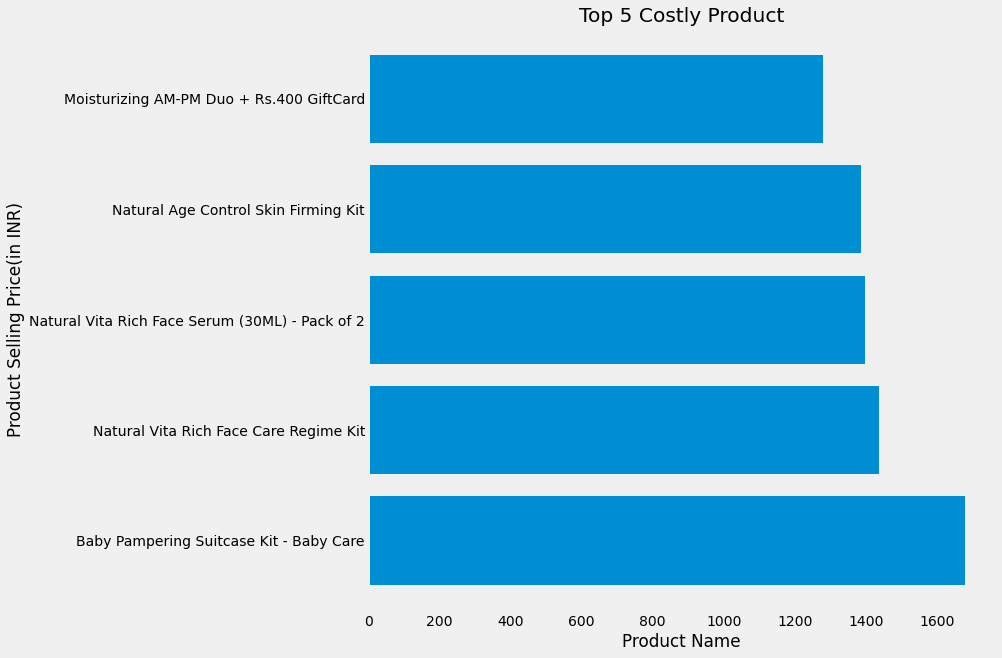

In [94]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))
plt.barh(costly_product_df["Product_Name"],costly_product_df["Selling_Price"])
plt.xlabel("Product Name")
plt.ylabel("Product Selling Price(in INR)")
plt.grid(False)
plt.title("Top 5 Costly Product")
plt.show()

In [95]:
#what are the 5 most cheap products
cheap_product_df = df.sort_values(["Selling_Price"],ascending=True).head()
cheap_product_df

,Product_Name,Selling_Price,Original_Price,Discount,Product_URL,Product_Rating,No_Of_People_Rated
0,Natural Baby Soap,113,150,0.25,https://themomsco.com/product/natural-baby-soa...,4.9,42
57,Natural Lip Balm,129,199,0.35,https://themomsco.com/product/the-moms-co-natu...,4.9,56
16,Natural Diaper Rash Cream (25gm) - Baby Care,129,199,0.35,https://themomsco.com/product/natural-diaper-r...,Not_available,0
153,Natural Ceramide Face Toner (100ml) - Face Care,147,226,0.35,https://themomsco.com/product/natural-ceramide...,5.0,2
102,Natural Baby Bottom Wash (50ML),147,226,0.35,https://themomsco.com/product/natural-baby-bot...,5.0,5


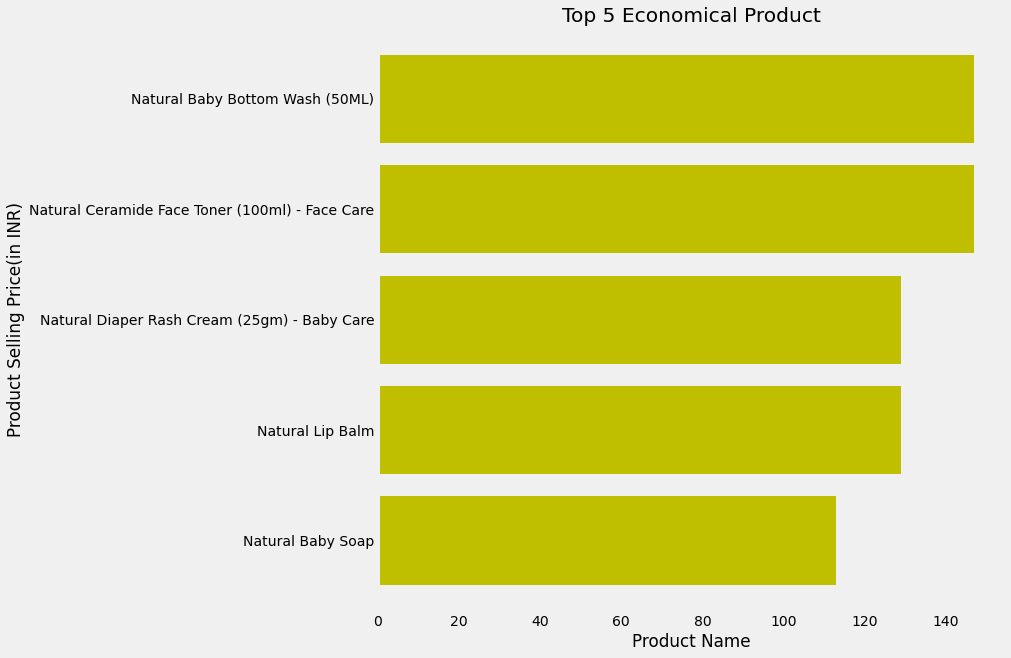

In [102]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))
plt.barh(cheap_product_df["Product_Name"],cheap_product_df["Selling_Price"],color="y")
plt.xlabel("Product Name")
plt.ylabel("Product Selling Price(in INR)")
plt.grid(False)
plt.title("Top 5 Economical Product")
plt.show()

In [107]:
#product which are having maximum discount
max_discount_df = df.sort_values(["Discount"],ascending=False).head()
max_discount_df

,Product_Name,Selling_Price,Original_Price,Discount,Product_URL,Product_Rating,No_Of_People_Rated
123,Natural Age Control Under Eye Cream And Face Oil,510,1020,0.5,https://themomsco.com/product/natural-age-cont...,5.0,2
147,Face & Lip Replenish Bundle,213,425,0.5,https://themomsco.com/product/face-lip-repleni...,Not_available,0
31,Oily Skin Hydration Essentials,586,1172,0.5,https://themomsco.com/product/oily-skin-hydrat...,5.0,5
126,Natural KA+ Damage Repair Hair Kit,492,984,0.5,https://themomsco.com/product/natural-damage-r...,5.0,9
128,Natural Hair Strengthening Oil 100ml,215,429,0.5,https://themomsco.com/product/natural-hair-str...,5.0,5


In [4]:
#we will further use the saved data to make a dynamic dash board using tableau

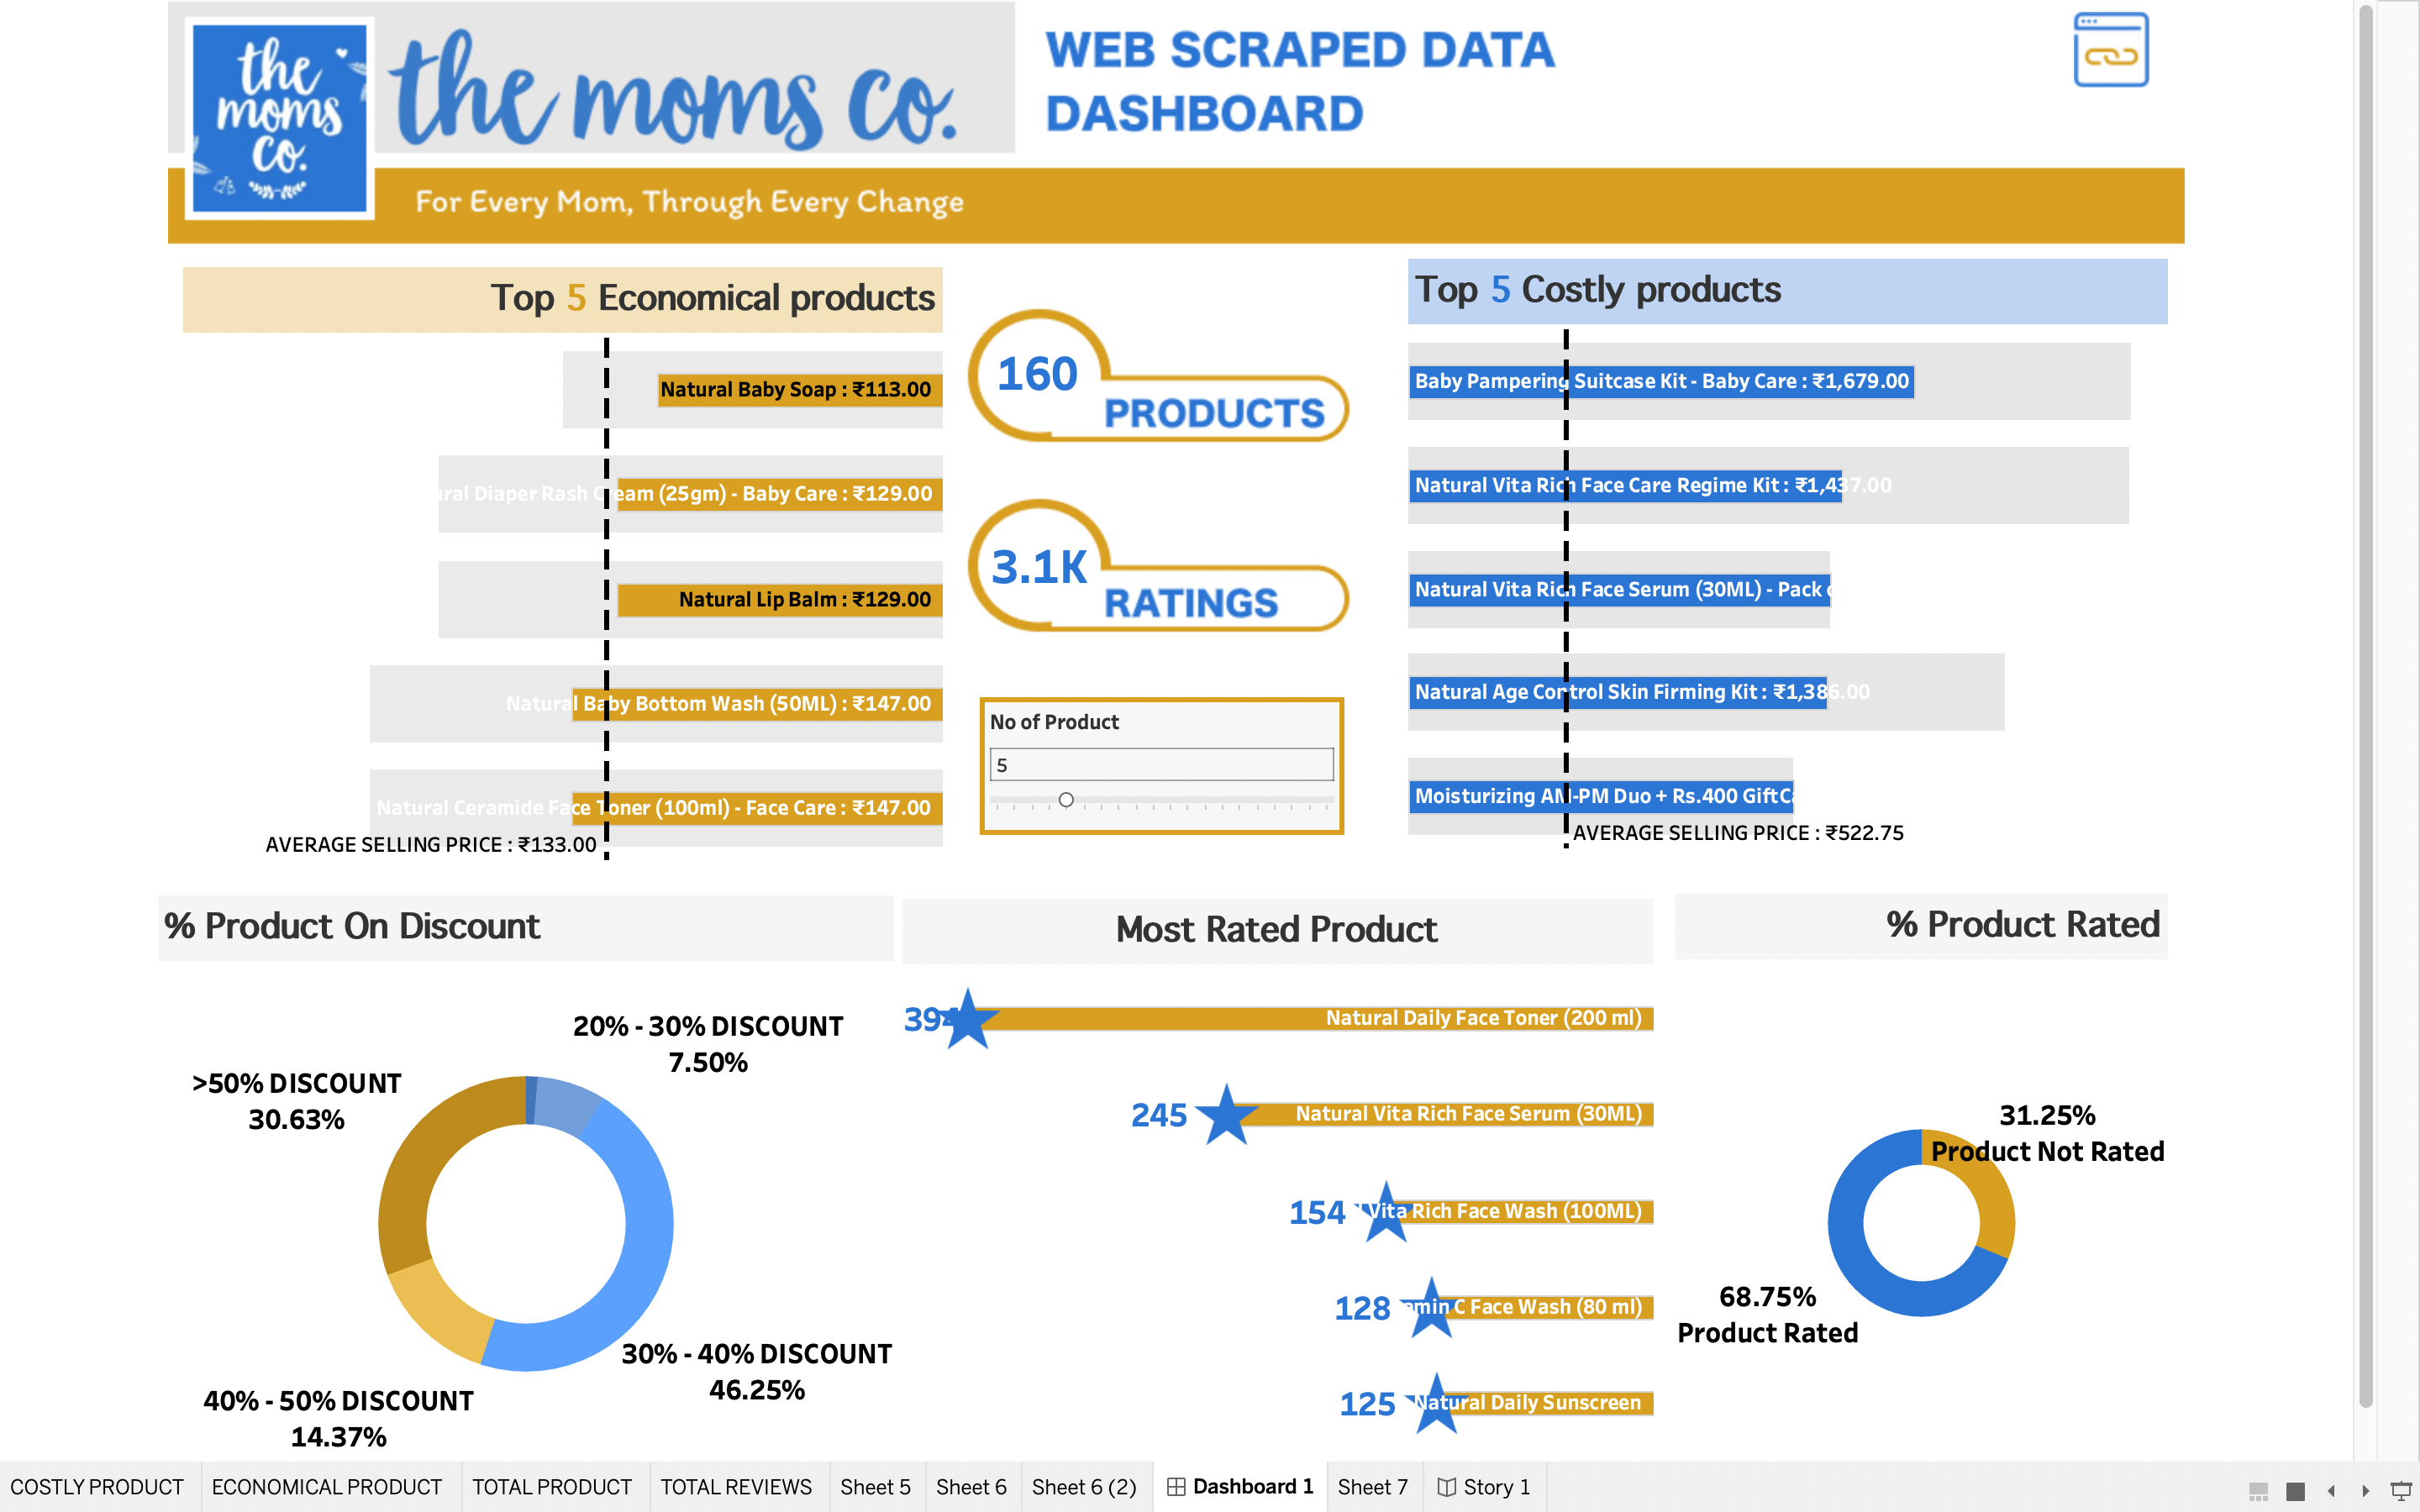

In [ ]:
#Above is the screen shot of the dashboard that I had made using Tableau